# 5.10 专题：流形学习

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

## 5.10.1 流形学习：“HELLO”

In [76]:
def make_hello(N=1000, rseed=42):
    # 画出HELLO文字形状的图像，并保存成PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # 打开这个PNG，并将一些随机点画进去
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    x = rng.rand(4 * N, 2)
    i, j = (x * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    x = x[mask]
    x[:, 0] *= (data.shape[0] / data.shape[1])
    x = x[:N]
    return x[np.argsort(x[:, 0])]

(-0.11881377209280353,
 4.140158966213945,
 0.0295819771725373,
 1.0142039520339077)

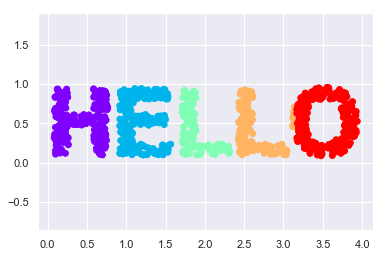

In [77]:
x = make_hello(1000)
colorize = dict(c=x[:,0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(x[:, 0], x[:, 1], **colorize)
plt.axis('equal')

In [15]:
from matplotlib.image import imread

In [16]:
data = imread('hello.png')[::-1, :, 0].T`

In [52]:
data[i, j] < 1

array([False, False,  True, ..., False, False,  True])

In [20]:
rng = np.random.RandomState(42)

In [22]:
x = rng.rand(4 * 1000, 2)

In [24]:
x.shape

(4000, 2)

In [25]:
i, j = (x * data.shape).astype(int).T

In [32]:
i

array([107, 210,  44, ...,  33,  60, 261])

In [30]:
j

array([68, 43, 11, ..., 19, 32,  7])

In [36]:
data[i[107], j[68]]

1.0

In [37]:
mask = (data[i, j] < 1)

In [38]:
x = x[mask]

In [39]:
x

array([[0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.83244264, 0.21233911],
       ...,
       [0.65477575, 0.22842585],
       [0.27401178, 0.31484116],
       [0.90843755, 0.10448032]])

In [40]:
x[:, 0] *= (data.shape[0] / data.shape[1])

In [42]:
x.shape

(1532, 2)

In [44]:
x = x[:1000]

In [45]:
x

array([[0.62407456, 0.15599452],
       [0.23233445, 0.86617615],
       [3.32977056, 0.21233911],
       ...,
       [2.49402124, 0.13128797],
       [1.23876684, 0.20179495],
       [0.73617909, 0.75645109]])

In [46]:
x[np.argsort(x[:, 0])]

array([[0.08373647, 0.31577315],
       [0.08729359, 0.66378969],
       [0.08849421, 0.32361022],
       ...,
       [3.92447163, 0.64950893],
       [3.92503031, 0.3816165 ],
       [3.93760872, 0.52569018]])

In [47]:
x.shape

(1000, 2)

## 5.10.2 多维标度法（MDS）（Multidimensional scaling）

In [70]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

In [78]:
x2 = rotate(x, 20) + 5

(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

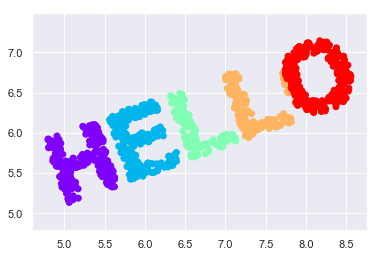

In [79]:
plt.scatter(x2[:, 0], x2[:, 1], **colorize)
plt.axis('equal')

计算原始数据的关系矩阵

In [73]:
from sklearn.metrics import pairwise_distances

In [80]:
D = pairwise_distances(x)

In [81]:
D.shape

(1000, 1000)

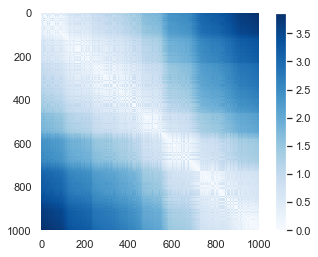

In [87]:
plt.imshow(D, zorder=100000, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [88]:
D2 = pairwise_distances(x2)

In [89]:
np.allclose(D, D2)

True

旋转平移之后结果相同

多维标度法解决的问题：它可以将一个数据集的距离矩阵还原成一个D维坐标来表示数据集

In [90]:
from sklearn.manifold import MDS

In [99]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)

In [100]:
out = model.fit_transform(D)

(-1.0390064107727597,
 1.0377133989963183,
 -2.0646660054511314,
 2.135458244484912)

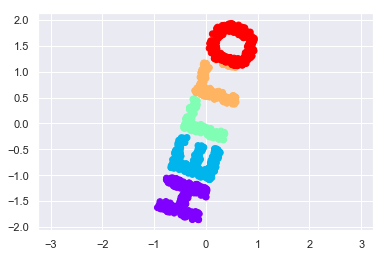

In [101]:
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

## 5.10.3 将MDS用于流形学习

In [102]:
def random_projection(x, dimension=3, rseed=42):
    assert dimension >= x.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(x, V[:x.shape[1]])

In [103]:
x3 = random_projection(x, 3)

In [104]:
x3.shape

(1000, 3)

In [105]:
x.shape

(1000, 2)

In [106]:
from mpl_toolkits import mplot3d

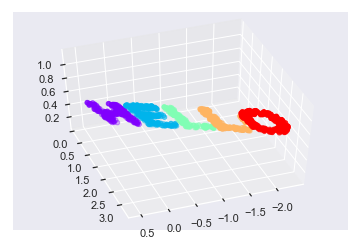

In [108]:
ax = plt.axes(projection='3d')
ax.scatter3D(x3[:, 0], x3[:, 1], x3[:, 2], **colorize)
ax.view_init(azim=70, elev=50)

现在可以通过MDS评估期输入这个三维数据，计算距离矩阵，然后得出距离矩阵的最优二维嵌入结果。结果还原了原始数据的形状。

In [109]:
model = MDS(n_components=2, random_state=1)

In [113]:
out3 = model.fit_transform(x3)

precomputed：则传入的不是点的坐标，而是距离矩阵

(-1.0390064107727601, 1.0377133989963192, -2.06466600545113, 2.135458244484914)

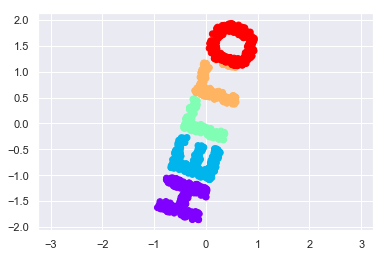

In [114]:
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

## 5.10.4 非线性嵌入：当MDS失败时

In [129]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

In [130]:
xs = make_hello_s_curve(x)

In [132]:
from mpl_toolkits import mplot3d

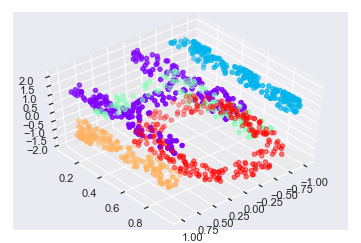

In [143]:
ax = plt.axes(projection='3d')
ax.scatter3D(xs[:, 0], xs[:, 1], xs[:, 2], **colorize)
ax.view_init(azim=50, elev=50)

In [144]:
from sklearn.manifold import MDS

In [145]:
model = MDS(n_components=2, random_state=2)

In [146]:
outs = model.fit_transform(xs)

(-1.3904556323554305, 1.249363762850495, -2.385549418165909, 2.189985912355557)

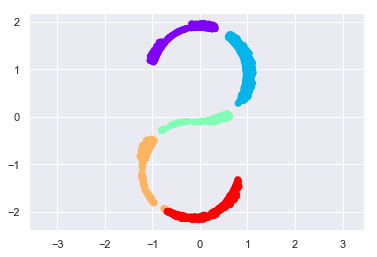

In [148]:
plt.scatter(outs[:, 0], outs[:, 1], **colorize)
plt.axis('equal')

## 5.10.5 非线性流形：局部线性嵌入（Locally Linear Embedding）

In [149]:
from sklearn.manifold import LocallyLinearEmbedding

In [159]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')

In [160]:
out = model.fit_transform(xs)

(0.15, -0.15)

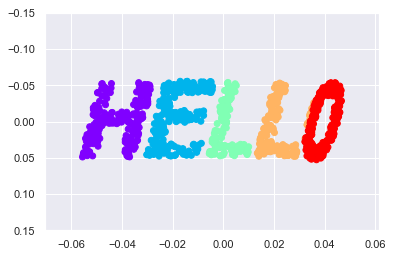

In [161]:
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

## 5.10.6 关于流形方法的一些思考

先用PCA探索数据的线性特征，再用流形方法探索数据的非线性特征。

## 5.10.7 示例：用Isomap处理人脸数据

In [162]:
from sklearn.datasets import fetch_lfw_people

In [163]:
faces = fetch_lfw_people(min_faces_per_person=30)

In [164]:
faces.data.shape

(2370, 2914)

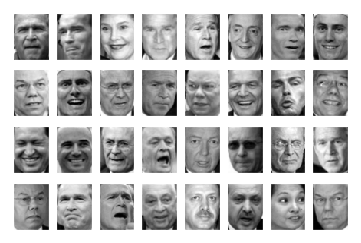

In [166]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

In [167]:
from sklearn.decomposition import PCA

In [168]:
model = PCA(100, svd_solver='randomized').fit(faces.data)

Text(0,0.5,'cumulative variance')

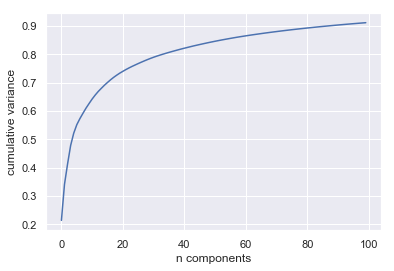

In [169]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')

In [8]:
from sklearn.manifold import Isomap

In [171]:
model = Isomap(n_components=2)

In [172]:
proj = model.fit_transform(faces.data)

In [173]:
proj.shape

(2370, 2)

In [14]:
from matplotlib import offsetbox

In [12]:
def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # 不展示距离很近的点
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap), proj[i])
            ax.add_artist(imagebox)

d:\python35\lib\site-packages\sklearn\utils\extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


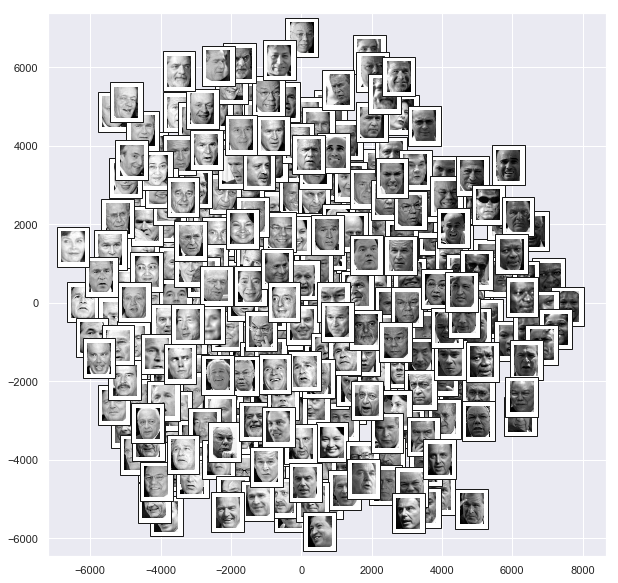

In [176]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, model=Isomap(n_components=2), images=faces.images[:, ::2, ::2])

In [177]:
x = [1, 2, 3, 4, 5]

In [182]:
x[::2]

[1, 3, 5]

## 5.10.8 示例：手写数字的可视化结构

In [1]:
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata('MNIST original')

d:\python35\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
d:\python35\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
mnist.data.shape

(70000, 784)

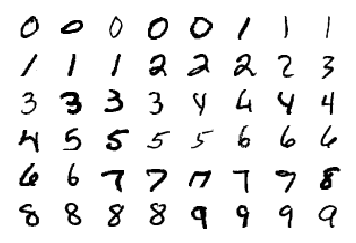

In [7]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

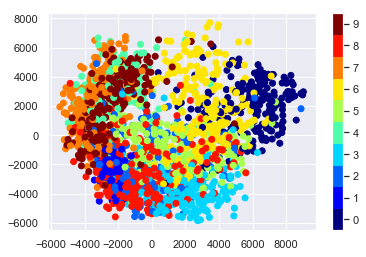

In [9]:
# 由于计算完整的数据集需要花很长时间，因此使用数据集的1/30
data = mnist.data[::30]
target = mnist.target[::30]

model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

In [10]:
# 选择1/4的数字“1”来投影
data = mnist.data[mnist.target == 1][::4]

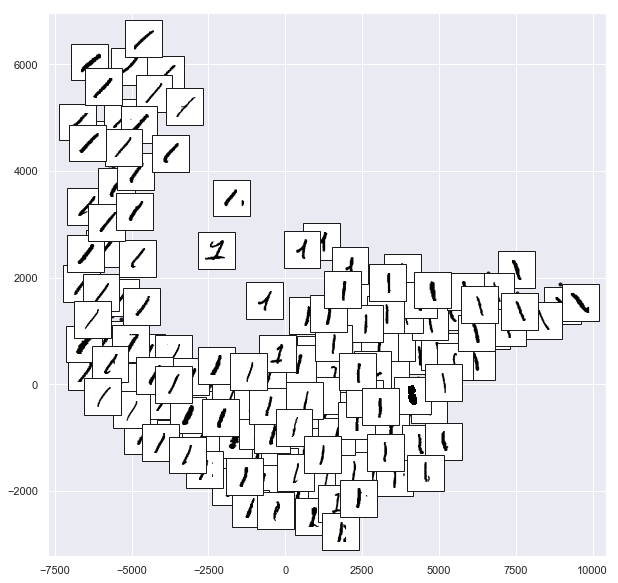

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)), ax=ax, thumb_frac=0.05, cmap='gray_r')